## BASIC IMPORTS

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

warnings.filterwarnings('ignore')

In [0]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [0]:
df.shape

(150, 6)

In [0]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## PREPROCESSING

In [0]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

###### There is no null value in the dataset

In [0]:
df.where(df==0).sum()

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

##### There is no zero value in the dataset

In [0]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [0]:
cols=df.select_dtypes(include=['object']).columns
le=LabelEncoder()
for i in cols:
    df[i]=le.fit_transform(df[i])

In [0]:
df['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

##### Label encoded the categorical column Species:
Iris-setosa - 0 
Iris-versicolor - 1 
Iris-virginica - 2     

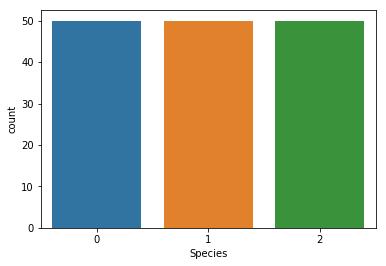

In [0]:
sns.countplot(df['Species'])

##### the total frequency of each species is 50

In [0]:
df.drop(columns='Id',axis=1,inplace=True)
#### since id is unique value and has no effect on the target value so we drop the column

#### Boxplot to detect outliers

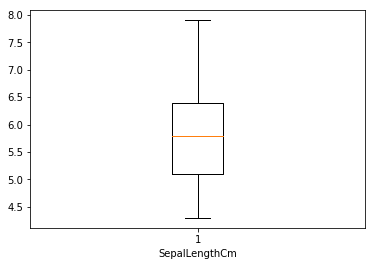

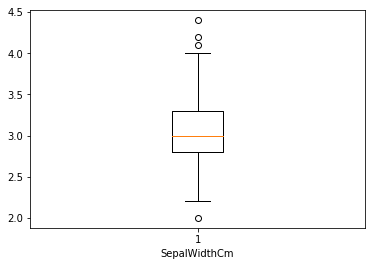

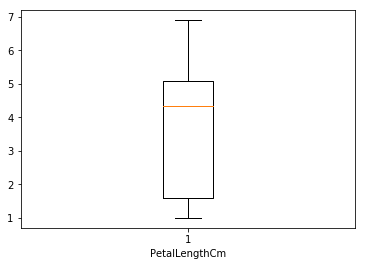

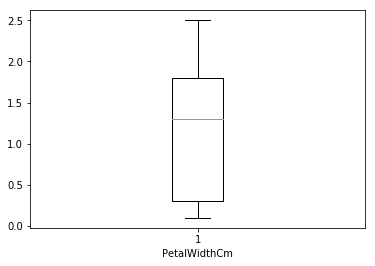

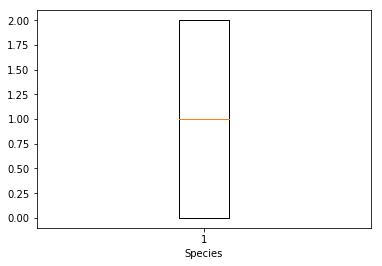

In [0]:
for i in list(df.columns):
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

##### Detecting outliers in the dataset above :
1) sepalwidthcm : some data points lie below 2.80(25%) and some lie above 3.30(75%) but we cant remove them since it wont affect the target 

##### the pairplot shows the scatterplot of the columns above

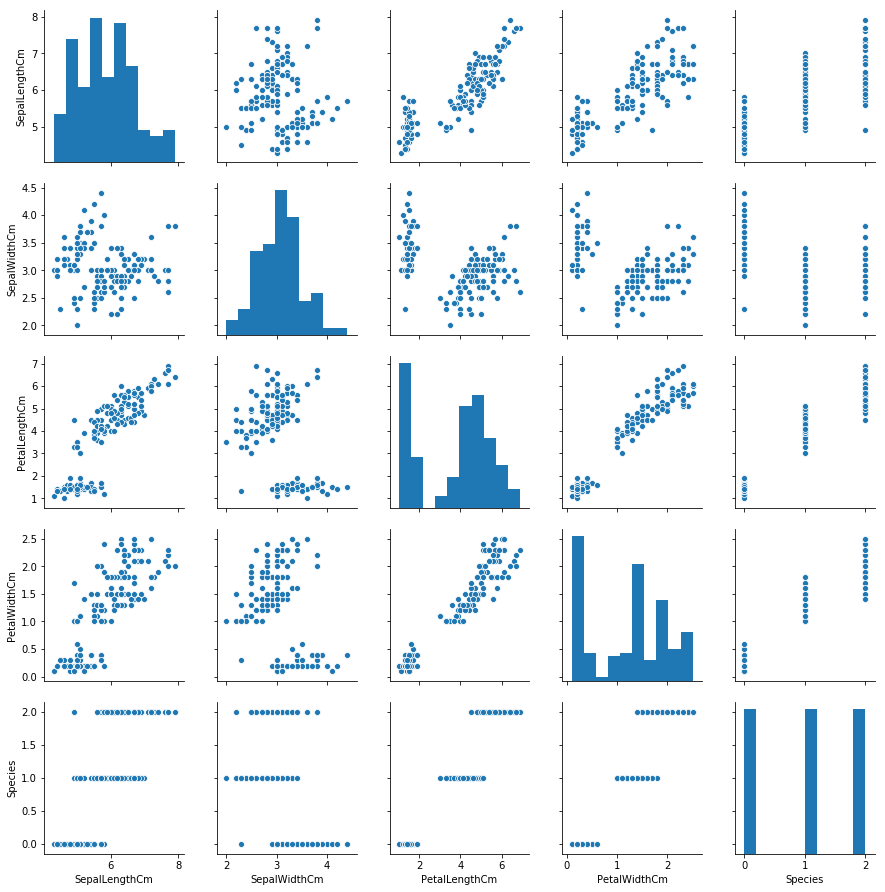

In [0]:
sns.pairplot(df)

#### scatter plot to check well-seperated features of each species 

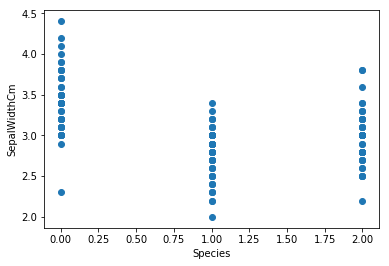

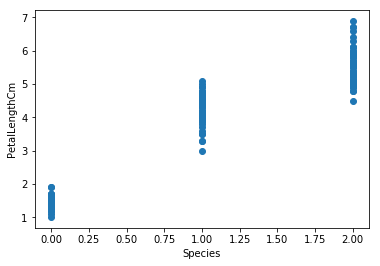

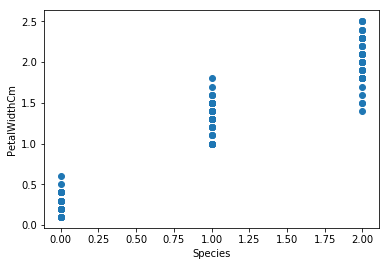

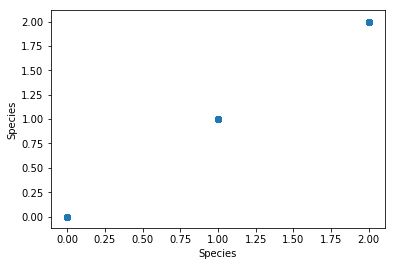

In [0]:
for column in list(df.columns)[1:]:
    plt.figure()
    plt.scatter(df['Species'],df[column])
    plt.xlabel('Species')
    plt.ylabel(column)
    
    plt.show()

##### it can be inffered that :
##### 1)PetalLengthcm is well seperated for Iris-setosa and Iris-virginica,Iris-setosa and Iris-versicolor species type
##### 2) PetalWidthcm is well seperated for Iris-setosa and Iris-virginica,Iris-setosa and Iris-versicolor species type


### Skewness :

In [0]:
from scipy.stats import skew
for i in df.columns:
    if i == 'Species' :
        continue
    else:
        print(i+':'+str(skew(df[i].values)))
        print()

SepalLengthCm:0.3117530585022963

SepalWidthCm:0.330702812773315

PetalLengthCm:-0.2717119501716388

PetalWidthCm:-0.10394366626751729



#### Skewness calculated above: 
##### 1)PetalLengthCm,PetalWidthCm,SepalWidthCm,SepalLengthCm are not  skewed as values lie between -0.5 and 0.5  


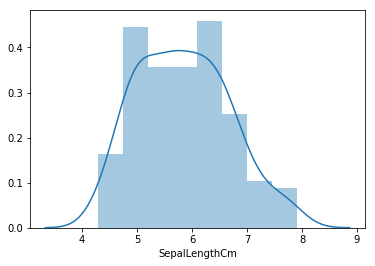

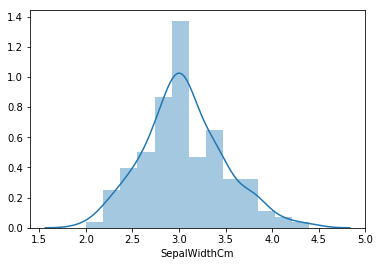

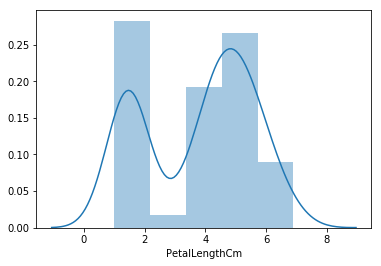

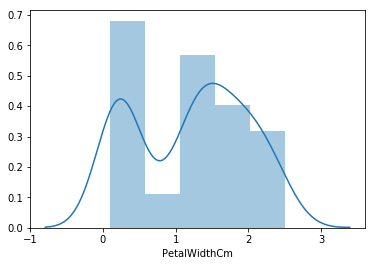

<Figure size 432x288 with 0 Axes>

In [0]:
##### Visualising the skewness 

for column in list(df.columns):
    plt.figure()
    if column=='Species':
        continue
    else:
        sns.distplot(df[column])
        plt.xlabel(column)
        

### Kurtosis :

In [0]:
from scipy.stats import kurtosis
for i in df.columns:
    if i == 'outcome' :
        continue
    else:
        x=df[i].values
        print(i+':'+str(kurtosis(x,fisher=False,bias=True)))
        print()

SepalLengthCm:2.4264320510750235

SepalWidthCm:3.2414432993831834

PetalLengthCm:1.6046406978602872

PetalWidthCm:1.6647543558688143

Species:1.5



##### Kurtosis shown above shows:
##### since SepalWidthCm value is >0.3 so it indicates outliers

### Normalising the data

In [0]:
features=df.columns.drop("Species")
target=["Species"]
features,target

(Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object'),
 ['Species'])

In [0]:
tar=pd.DataFrame()

In [0]:
tar=df['Species']

In [0]:
scaler=MinMaxScaler()
scaled_values=scaler.fit_transform(df[features])

In [0]:
df_enc=pd.DataFrame()
c=0
for i in features:
    df_enc[i]=scaled_values[:,c]
    c+=1

In [0]:
df_enc.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [0]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X=df.drop('Species',1)
# y=df['Species']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=100)
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.fit_transform(X_test)

In [0]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


###  FEATURE ENGINEERING

#### the features selected using LDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train1 = lda.fit_transform(X_train, y_train)
X_test1 = lda.transform(X_test)
variance1=lda.explained_variance_ratio_
variance1

array([0.99170061, 0.00829939])

#### the features selected using PCA

In [0]:
'''pca=PCA(n_components=3)
X_train1=pca.fit_transform(X_train)
X_test1=pca.fit_transform(X_test)
variance=pca.explained_variance_ratio_
variance'''

'pca=PCA(n_components=3)\nX_train1=pca.fit_transform(X_train)\nX_test1=pca.fit_transform(X_test)\nvariance=pca.explained_variance_ratio_\nvariance'

In [0]:
pca.components_

NameError: name 'pca' is not defined

#### calculating variance of the features

In [0]:
df.var().sort_values()

SepalWidthCm     0.188004
PetalWidthCm     0.582414
Species          0.671141
SepalLengthCm    0.685694
PetalLengthCm    3.113179
dtype: float64

#### we can infer that SepalWidthCm is least variant and PetalLengthCm is most variance

#### calculating correlation :

In [0]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


##### the values between -0.7 and 0.7 are highly correlated to target variable-->SepalLengthCm,PetalLengthCm,PetalWidthCm

#### Visualising correlation

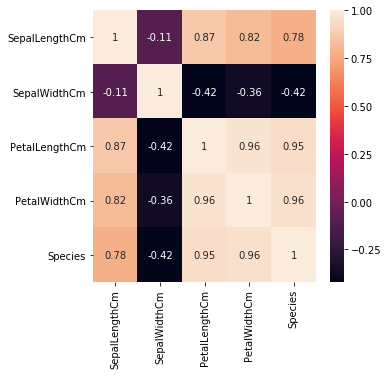

In [0]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)

#### Splitting the dataset into traing and test set with 80:20 ratio

In [0]:
# splitting data to train and test
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=100)
# X_train.shape,X_test.shape

### MODEL BUILDING

In [0]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier(min_impurity_decrease=0.05)
model3 = KNeighborsClassifier()
model4 = SVC(kernel="rbf")
scaler = MinMaxScaler()

In [0]:
names=['Logistic Regression','Decision Tree','KNN','SVC']
j=0
for i in [model1,model2,model3,model4]:
    
    i.fit(X_train1,y_train)
    train_accuracy = i.score(X_train1,y_train)
    test_accuracy = i.score(X_test1,y_test)
    print(names[j])
    j+=1
    print(train_accuracy,test_accuracy)

Logistic Regression
0.9416666666666667 0.9666666666666667
Decision Tree
0.9833333333333333 1.0
KNN
0.9833333333333333 0.9666666666666667
SVC
0.975 0.9666666666666667


#### USING ENSEMBLING TECHNIQUES TO INCREASE THE MODEL ACCURACY:
#### 1) random forest
#### 2) adaboost
#### 3) kfold

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,
                               min_samples_split=20,
                               min_impurity_decrease=0.05)
model.fit(X_train,y_train)
train_accuracy = model.score(X_train,y_train)
test_accuracy = model.score(X_test,y_test)
print(train_accuracy,test_accuracy)

0.975 0.9666666666666667


In [0]:
from sklearn.ensemble import AdaBoostClassifier
model5 = AdaBoostClassifier(n_estimators=10)
model5.fit(X_train,y_train)
train_accuracy = model5.score(X_train,y_train)
test_accuracy = model5.score(X_test,y_test)
print(train_accuracy,test_accuracy)

In [0]:
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
k_fold = KFold(n_splits=8,shuffle=False,random_state=100)

names=['Logistic Regression','Decision Tree','KNN','SVC']
j=0
for k in [model1,model2,model3,model4]:
    train_accuracy = []
    val_accuracy = []
    for i,(train,val) in enumerate(k_fold.split(X,y)): 
        k.fit(X.iloc[train],y.iloc[train])
        train_accuracy.append(k.score(X.iloc[train],y.iloc[train]))
        val_accuracy.append(k.score(X.iloc[val],y.iloc[val]))
    print(names[j])
    j+=1
    print(np.mean(train_accuracy),np.mean(val_accuracy))
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    #ax = fig.add_subplot(111)
    val_accuracy1=pd.DataFrame(val_accuracy)
    val_accuracy1.plot(kind="box",figsize = (10,7))
    #plt.boxplot(val_accuracy)
    #ax.set_xticklabels(names)
    #plt.show()
    #names1=pd.DataFrame(names)
df_score=pd.DataFrame(data=[model_score_test,model_score_test1,model_score_test2,model_score_test3],
                      index=["logistic","Dtree","KNN","SVM"],
                      columns=['s1','s2','s3','s4','s5'])
    

#### Confusion Matrix

In [0]:
for k in [model1,model2,model3,model4]:
    train_predictions=k.predict(X_train)
    test_predictions=k.predict(X_test)
    train_conf_matrix=confusion_matrix(y_train,train_predictions)
    test_conf_matrix=confusion_matrix(y_test,test_predictions)
    print(pd.DataFrame(train_conf_matrix,columns=k.classes_,index=model.classes_))
    print('\n')

##### Decision tree is the best model having least type 1 and type 2